In [11]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from collections import Counter

from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from bertopic.representation import MaximalMarginalRelevance
from hdbscan import HDBSCAN
from umap import UMAP
from sklearn.feature_extraction.text import CountVectorizer

from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, OpenAI, PartOfSpeech

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import numpy as np
import pandas as pd

[nltk_data] Downloading package punkt to /home/msaxena4/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/msaxena4/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/msaxena4/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/msaxena4/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
# Function to extract entities and count their occurrences
def extract_entities_and_count(title_series):
    entities = Counter()
    for title in title_series:
        # Tokenize the title
        words = word_tokenize(title)
        # Perform part-of-speech tagging
        tagged_words = pos_tag(words)
        # Perform named entity recognition
        ner_tags = ne_chunk(tagged_words)
        # Extract named entities and count their occurrences
        for chunk in ner_tags:
            if hasattr(chunk, 'label'):
                entity = ' '.join(c[0] for c in chunk)
                entities[entity] += 1
    return entities

In [4]:
data = pd.read_csv('data/Gaza_WarNews.csv')

In [8]:
data[['media_name', 'media_url']].value_counts()

media_name     media_url    
foxnews.com    foxnews.com      8334
aljazeera.com  aljazeera.com    5277
Name: count, dtype: int64

In [9]:
data.head()

,id,indexed_date,language,media_name,media_url,publish_date,title,url
0,75832df2a44e1eb527447e510a0c2f4492b91675417e9d...,2024-09-04 0:17:25,en,aljazeera.com,aljazeera.com,2024-09-03,Journalist presses State Department for answer...,https://www.aljazeera.com/program/newsfeed/202...
1,476105414ae8fb864fccd91cb64991ec266d274abb7ec9...,2024-09-03 19:21:49,en,foxnews.com,foxnews.com,2024-09-03,Iran slammed for record surge in executions of...,https://www.foxnews.com/world/iran-slammed-rec...
2,e45384704fd34b923c8af82b6eb2416cea7f634ef19665...,2024-09-04 0:18:51,en,foxnews.com,foxnews.com,2024-09-03,"President Biden smiles, ignores press shouting...",https://www.foxnews.com/media/president-biden-...
3,dabaf9364e02b9a5389f1c783f66d078603c24f5fcccb2...,2024-09-03 23:20:10,en,foxnews.com,foxnews.com,2024-09-03,US DOJ charges Hamas leaders over 'terrorist a...,https://www.foxnews.com/world/us-doj-charges-h...
4,591197a1bdbcac29e30a2f6c383535f19bfa366746c4c1...,2024-09-03 19:20:33,en,aljazeera.com,aljazeera.com,2024-09-03,What does the UK’s partial stop on arms export...,https://www.aljazeera.com/news/2024/9/3/what-d...


In [6]:
# Extract and count entities from war news titles
war_titles = data.title.to_list()
entities = extract_entities_and_count(war_titles)

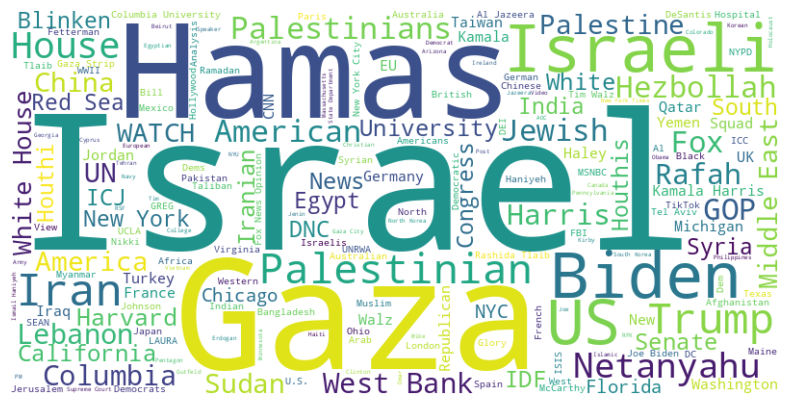

In [12]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(entities)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [16]:
# Get top 100 most frequent entities
entities.most_common(100)

[('Israel', 2650),
 ('Gaza', 1651),
 ('Hamas', 1181),
 ('Israeli', 1058),
 ('Biden', 1008),
 ('US', 933),
 ('Iran', 410),
 ('Trump', 374),
 ('Palestinian', 353),
 ('House', 277),
 ('Netanyahu', 254),
 ('American', 199),
 ('Palestinians', 193),
 ('Hezbollah', 177),
 ('GOP', 176),
 ('Jewish', 175),
 ('Fox', 174),
 ('Rafah', 161),
 ('Harris', 160),
 ('Columbia', 146),
 ('West Bank', 143),
 ('Lebanon', 139),
 ('China', 127),
 ('Palestine', 125),
 ('America', 123),
 ('Sudan', 119),
 ('UN', 118),
 ('WATCH', 109),
 ('Middle East', 105),
 ('White House', 94),
 ('Harvard', 89),
 ('University', 88),
 ('News', 87),
 ('Iranian', 86),
 ('California', 85),
 ('IDF', 82),
 ('Senate', 79),
 ('White', 77),
 ('India', 73),
 ('Syria', 70),
 ('DNC', 68),
 ('South', 68),
 ('Blinken', 67),
 ('ICJ', 67),
 ('New York', 66),
 ('Congress', 66),
 ('Houthi', 66),
 ('Red Sea', 65),
 ('Egypt', 65),
 ('Houthis', 64),
 ('Chicago', 64),
 ('Florida', 63),
 ('NYC', 63),
 ('Washington', 63),
 ('Iraq', 61),
 ('EU', 60),
 (